# Getting help

Part of what makes tools like R more accessible than ever before is how easy it is to get help. For R and its primary data science library, tidyverse, the excellent (and free) book "R for Data Science" can be found at http://r4ds.had.co.nz/

When doing basic analyses, simple web searches will often help you either find documentation or explanations for accomplishing most tasks. [Stack Overflow](https://stackoverflow.com/) is a great source and has specific areas for R and its libraries like dplyr which is the primary library for manipulating data: https://stackoverflow.com/questions/tagged/r+dplyr. The main pages for each library also offer great documentation like [dplyr](http://dplyr.tidyverse.org/). 

RStudio also provides several "cheatsheets" which are useful references here: https://www.rstudio.com/resources/cheatsheets/

Finally, when you are using RStudio, you can get built in help by using the help function by adding a question mark before the command you want help with like ```?function()```. This function may not work with Jupyter notebooks depending on your operating system.

# Adding our data science libraries

To get start our exploration of data science tools with R, we are going to use a dataset from the [Capital Bikeshare](https://www.capitalbikeshare.com/) in 2011 and 2012. A description of the dataset is [here](./data/bike_data_readme.txt).

The first thing we need to do is load the [Tidyverse data science library](http://tidyverse.org).  R has thousands of additional libraries you can add to accomplish many different tasks without having to code them yourself. A partial listing is [here](https://cran.r-project.org/web/packages/available_packages_by_name.html). Given R's statistical and academic orgins, many of the scientific libraries were subjected to peer review as the code provided the method for scientific research papers- https://scholar.google.com/scholar?start=120&q=%22R+Core+Team%22. 

For our Jupyter Hub environment, we have pre-loaded many libraries, so you shouldn't need to install new ones for these exercises.

In [2]:
# load tidyverse into your R session
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.0     ✔ stringr 1.3.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


# Load data from a CSV file

Loading data is easy. We will use the `read_csv` function to read the data from our file into a variable called `df` which is short for dataframe.  In R, you assign things to variables with the `<-` operator. 

In [3]:
df <- read_csv("data/bike_day.csv") # run this code block....

Parsed with column specification:
cols(
  instant = col_integer(),
  dteday = col_date(format = ""),
  season = col_integer(),
  yr = col_integer(),
  mnth = col_integer(),
  holiday = col_integer(),
  weekday = col_integer(),
  workingday = col_integer(),
  weathersit = col_integer(),
  temp = col_double(),
  atemp = col_double(),
  hum = col_double(),
  windspeed = col_double(),
  casual = col_integer(),
  registered = col_integer(),
  cnt = col_integer()
)


After you run this cell R will provide a printout of how it decided to encode the column headers and the datatype of each column. Datatypes are important given functions may require specific datatypes. For example, if you encode a column of your csv file with data like "1-11-2018" as a string or character type, R will not be able to perform any date functions on it.

As with most things in R, you can override default functionality specify the datatypes as follows:

```R
df <- read_csv("data/bike_day.csv", col_types = 
  cols(instant = col_integer(),
  dteday = col_date(format = ""),
  season = col_integer(),
  yr = col_integer(),
  mnth = col_integer(),
  holiday = col_integer(),
  weekday = col_integer(),
  workingday = col_integer(),
  weathersit = col_integer(),
  temp = col_double(),
  atemp = col_double(),
  hum = col_double(),
  windspeed = col_double(),
  casual = col_integer(),
  registered = col_integer(),
  cnt = col_integer()
  )
)
```

As we will see later, RStudio makes this much easier.

# Look at the data you loaded

To see your data, just enter your dataframe name into a code cell and execute it.

In [4]:
df

instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2011-01-01,1,0,1,0,6,0,2,0.3441670,0.3636250,0.805833,0.1604460,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.3634780,0.3537390,0.696087,0.2485390,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.1963640,0.1894050,0.437273,0.2483090,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.2000000,0.2121220,0.590435,0.1602960,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.2269570,0.2292700,0.436957,0.1869000,82,1518,1600
6,2011-01-06,1,0,1,0,4,1,1,0.2043480,0.2332090,0.518261,0.0895652,88,1518,1606
7,2011-01-07,1,0,1,0,5,1,2,0.1965220,0.2088390,0.498696,0.1687260,148,1362,1510
8,2011-01-08,1,0,1,0,6,0,2,0.1650000,0.1622540,0.535833,0.2668040,68,891,959
9,2011-01-09,1,0,1,0,0,0,1,0.1383330,0.1161750,0.434167,0.3619500,54,768,822
10,2011-01-10,1,0,1,0,1,1,1,0.1508330,0.1508880,0.482917,0.2232670,41,1280,1321


A dataframe is a two dimensional matrix much like an Excel worksheet where each column has a name and data is presented in rows. 

In order to access the data from specific columns we can use the following syntax:

```R
dataframe$columnname
```

If you try this in a code cell, you will see all the potential columns show up to select if you hit `tab` after the `$` symbol.

You can access ranges of columns or rows with this syntax:

```R
dataframe[rows, columns]
dataframe[1:5,] # This would retrieve (what we call slice) the first 5 rows.
dataframe[,1:5] # This would retrieve (what we call slice) the first 5 columns.
```

You can also slice columns based on their name.

```R
dataframe['columnname'] # one column named 'columnname'
dataframe[c('columnname1','columnname2')] # two columns using `c()` combine function.
```



In [ ]:
# try slicing your dataframe here

# Visualize the data

Creating a plot of your data is often one of the first approaches data scientists use to better understand the data and specifically look at the distribution of the data.

R has two major plotting packages `plot()` and `ggplot()`. Ggplot2 is the most popular, so we will use it going forward. 

The general syntax is to set up an empty plot `ggplot()` and then add a geom or "geometrical object" to represent the data. Geoms inlcude points, bars, lines, and other graphical representations. Here is a simple example:

```R
ggplot(data = dataframe) # this creates an empty plot that you can add layers to using the 

+ # this adds the layer functions we want to the base plot

geom_points(mapping = aes(x=x_column+name, y=y_column_name)) # geom_points says we want a scatterplot (points) and mapping = defines how we want to map variables into the x and y axes

```

The `aes()` stands for "aesthetic" and is where you define how you want to display the data on the plot. This term is derived from concepts behind the book [Grammar of Graphics](https://www.amazon.com/Grammar-Graphics-Statistics-Computing/dp/0387245448) which is also why ggplot has a "gg" in its name. 

It is easy to add custom formatting to a plot by adding on functions with a plus symbol `+`. Here are some of the basic ones:


```R
+ ggtitle("Main plot title") # add a title
+ ylab("This is the Y axis") # add a axis label change y to x for other axis
```

Execute the code in the next code block. Try changing the geom from geom_point to other shapes. You can also add geoms that conduct statistical transforms to represent the data line `geom_smooth()` http://ggplot2.tidyverse.org/reference/geom_smooth.html.


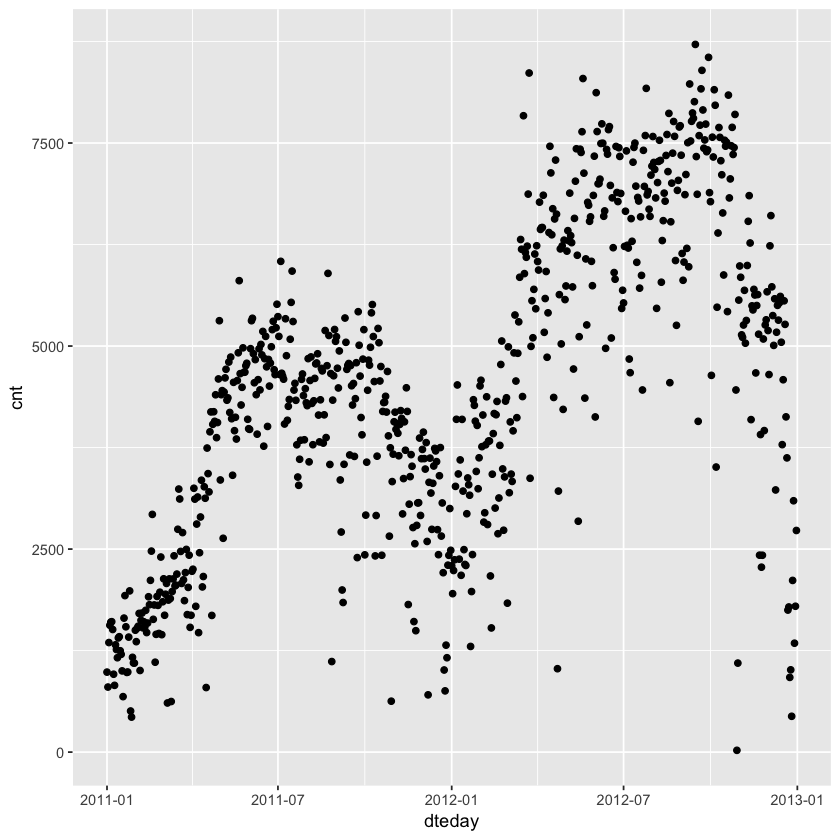

In [5]:
ggplot(data=df) + 
    geom_point(mapping= aes(x=dteday, y=cnt))

## Make your plot your own

Try adding more formatting (titles, better axes labels, etc.) to the base plot using the `+` operator and optional formatting from this document- https://www.rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf

In [ ]:
# insert your plot and ggplot options here and run....

# Using dplyr to continue the analysis

After an intial visualization, most analyses will involve looking at different or more specific manipulations of the data in the dataframe. Dplyr offers several useful functions for this manipulation including:

```R
summarise() # create new variables which summarize the data, for example a mean of values
filter() # filter out cases (usually rows based on their values)
mutate() # add new variables to the dataframe
select() # choose a subset of columns in a dataframe
arrange() # sort the dataframe
group_by() # analyze the data by grouping
```

These different functions can be combined to create a data pipeline where each step is a different operation on the dataframe. In dplyr, data can be pipelined between different steps using the pipeline operator `%>%` (more details are [here]( https://cran.r-project.org/web/packages/magrittr/vignettes/magrittr.html)).  Be sure to note that the pipeline operator `%>%` is not the same as the assignment operator `->`. Here is an example using both:

```R
df %>% 
select(col1, col2) %>% 
mutate(col_add = col1 + col2) -> df_new
```

The code block above does the following:

* line1: send the dataframe to the next function/line
* line 2: select the two columns called "col1" and col2" from df and send to the next function/line (some suggest that the pipeline operator be pronounced "then" when reading through the code).
* line 3: take the new dataframe (just two columns) and create a new column called "col_add" as a sum of the two columns and assign to a dataframe called "df_new".




The best way to guide an analysis is to start with a question to answer


# Do rentals vary by day of the week?

To answer this question, we need to examine the count of rentals "cnt" in groups defined by the day of the week "weekday" where Sunday is 0. We can then look at the average count of rentals by weekday. Then we can plot the results.

In [ ]:
df %>%
group_by(weekday) %>%
summarize(avg = mean(cnt))  %>%
ggplot(aes(x=weekday, y=avg)) +
geom_col()

# Do rentals vary by season?

To answer this question, we need to examine the count of rentals "cnt" in groups defined by the season "season" (1:spring, 2:summer, 3:fall, 4:winter). We can then look at the average count of rentals by season. Then we can plot the results.

Notice, we used the same code from above, but changed our group_by variable and subsequent x axis.

Experiment with different versions of dplyr functions to better understand how they work.

In [ ]:
df %>% 
group_by(season) %>%
summarize(average = mean(cnt)) %>%
ggplot(aes(x=season, y=average)) +
geom_col()

# Do rentals vary by temperature?

For this analysis, try to make a visualization that can describe the relationship between rentals and temperature.

In [ ]:
# explore rentals versus temperature here

# Conduct an end-to-end analysis in RStudio

Next, we will conduct a simplified end-to-end analysis of a weather dataset.

## [Please continue in the next notebook page by clicking here](Weather_Data_Analysis.ipynb)